### Q1. How can you create a Bokeh plot using Python code?


In [1]:
from bokeh import io, plotting
from bokeh.plotting import figure, output_file, show 
io.output_notebook()
import numpy as np 


Loading BokehJS ...

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.random(100)

p = figure(title="A simple line plot", x_axis_label="x", y_axis_label="y")

p.line(x, y)

# output_file("line_plot.html")

show(p)

### Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.


In [10]:
# Glyphs are visual shapes that are drawn to represent the data on a Bokeh plot, such as circles, squares, lines,
# rectangles, etc. Each glyph has a set of attributes that can be associated with data columns from a ColumnDataSource 
# object, which is a common data container for Bokeh plots.

# Example
x = np.random.random(10)
y = np.random.random(10)

p = figure(title = 'Circle glyphs Plot', x_axis_label = "x" , y_axis_label = "y" )

p.circle(x,y) 

show(p)


: 

### Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?


In [7]:
# To customize the appearance we can use various attributes and methods of figure object like:

# sizing_mode: to change the size of plot using width & height
# background_fill_color: change the background color of the plot 
# styling title text using
    # text_font
    # text_color
    # text_font_size
# Styling axes of plot 
    # axis_line_color
    # major_label_text_color
    # axis_label_standoff
#styling Legend: 
    #properties like Location, orientation, label_text_color

#example 
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.cos(x)

p = figure(title= 'A plot', x_axis_label = "x", y_axis_label = 'y')
p.width = 500
p.height = 200
p.background_fill_color = 'lightblue'
p.border_fill_color = 'white'
p.outline_line_width = 3
#title
p.title.text_color = 'darkblue'
p.title.text_font = 'italic'
p.title.text_font_size = '25px'
p.title.align = 'center'
# axis attributes 
p.xaxis.axis_label = 'Angle(radian)'
p.xaxis.axis_line_color = 'black'
p.xaxis.axis_label_text_color = "black" 
p.xaxis.major_label_text_color = "black"
p.xaxis.major_tick_line_color = "black" 
p.xaxis.minor_tick_line_color = "gray" 
p.xaxis.axis_label_standoff = 10 
p.xaxis.major_label_orientation = np.pi/4 

# Change some y-axis attributes
p.yaxis.axis_label = "Value" 
p.yaxis.axis_line_color = "black" 
p.yaxis.axis_label_text_color = "black" 
p.yaxis.major_label_text_color = "black" 
p.yaxis.major_tick_line_color = "black" 
p.yaxis.minor_tick_line_color = "gray"

output_file('line.html')
p.line(x,y1, legend_label ='sin(x)',
        line_width = 2, line_color = 'red'  )
p.line(x, y2, legend_label = 'cos(x)', 
       line_width = 2, line_color = 'green')

#legend attr. 
p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

show(p)

### Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?


A Bokeh server allows us to build interactive web applications that are connected to Python code running on a server. The Bokeh server synchronizes data between the underlying Python environment and the BokehJS library running in the browser, enabling you to respond to UI events, update plots, stream data, and more.

In [9]:
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import Slider
from bokeh.plotting import figure
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

p = figure(title="Sine wave", x_axis_label="x", y_axis_label="y")

line = p.line(x, y)

slider = Slider(title="Frequency", value=1.0, start=0.1, end=5.0, step=0.1)

def update_data(attr, old, new):
    freq = slider.value

    x = np.linspace(0, 10, 200)
    y = np.sin(freq * x)

    line.data_source.data = dict(x=x, y=y)

slider.on_change("value", update_data)

layout = column(slider, p)
curdoc().add_root(layout)

# to run this we need to first save this in a .py file then run command 
# bokeh serve --show file_location/file_name.py
# snap attached for the above code


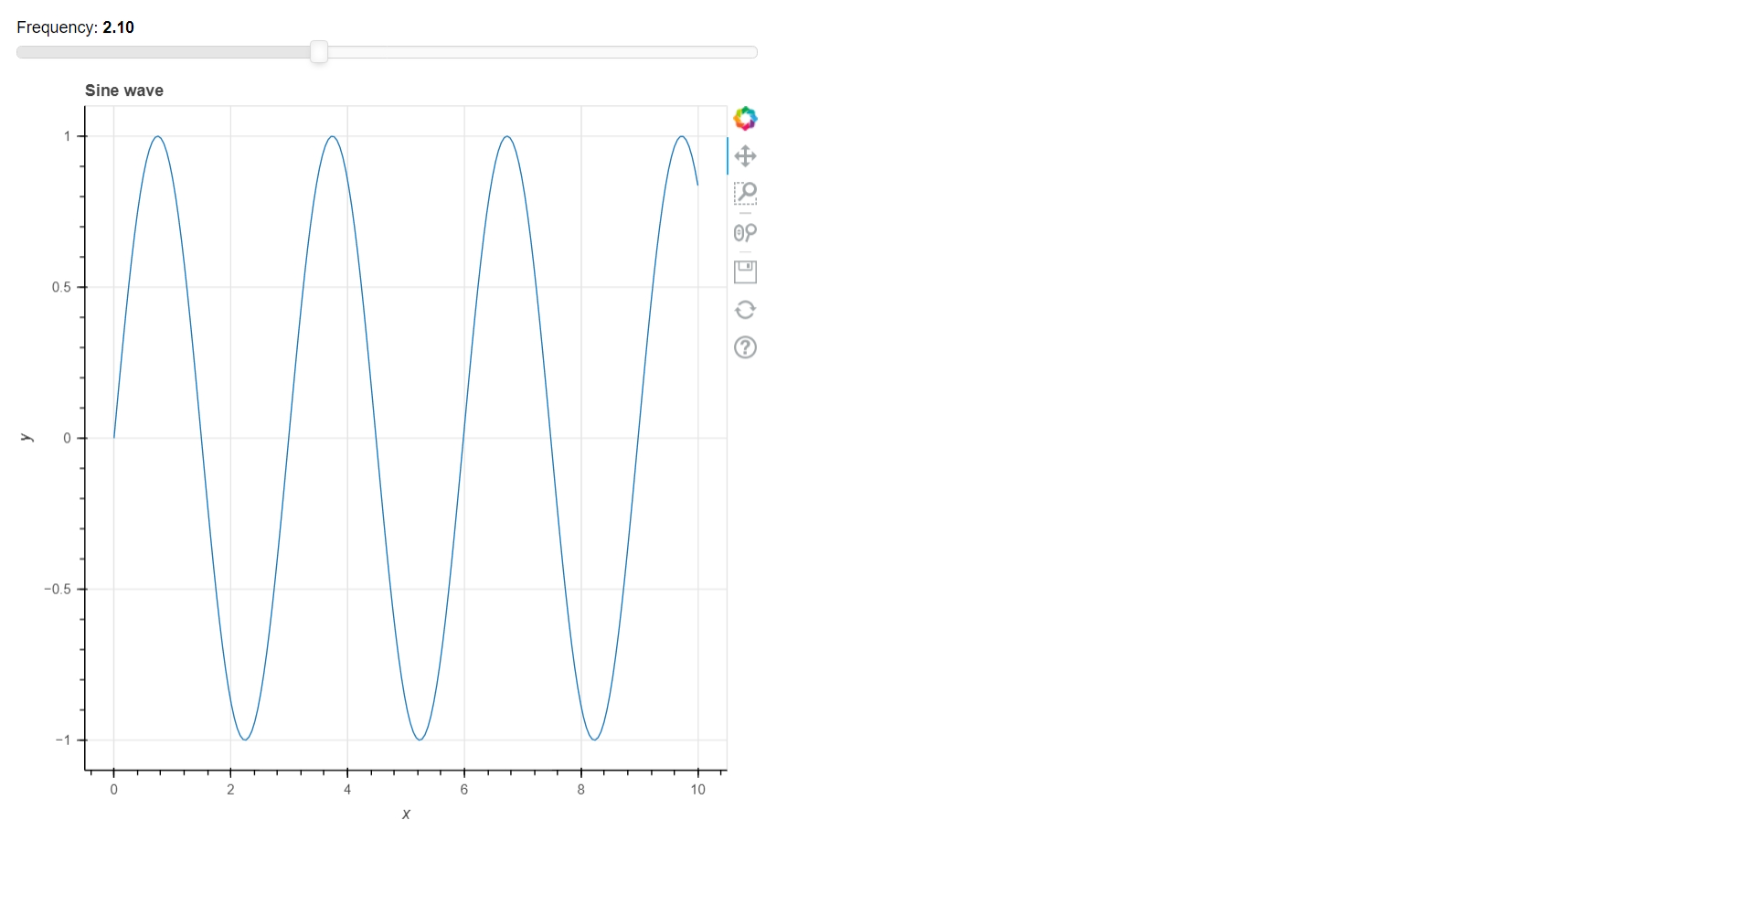

### Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

In [29]:
from flask import Flask, render_template
from bokeh.embed import components
from bokeh.plotting import figure

app = Flask(__name__)

@app.route('/')
def homepage():

    ### First Plot ###
    p1 = figure(height = 400, sizing_mode = "stretch_width")
    p1.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

    script1, div1 = components(p1)

    return render_template(
        'plot.html',
        script  = script1,
        div     = div1
        )

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [12]:
from bokeh.plotting import figure, output_file, show

# Create a Bokeh plot
p = figure(title="A simple line plot", x_axis_label="x", y_axis_label="y")
p.line([1, 2, 3, 4], [2, 4, 6, 8])

# Save and display the plot
output_file("plot.html")
show(p)